
<div dir = "rtl" style="font-size: 24px;>
    بخش اول: بررسی و پیش‌پردازش داده
</div>

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.utils import to_categorical
from copy import deepcopy
from random import randint
import pickle
from tensorflow import keras as tfk
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow.keras import *

2023-01-31 09:31:38.220396: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-31 09:31:38.689451: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-01-31 09:31:38.689466: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-31 09:31:40.627249: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

# Phase1 : Data Preprocessing and Visualization

<div dir = "rtl" style="font-size: 16px;">
    ۱−
</div>

Class = 1


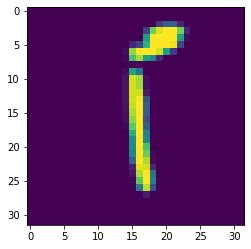


Class = 2


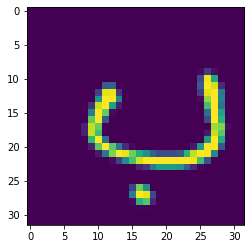


Class = 3


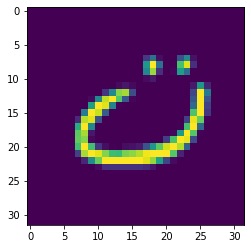


Class = 4


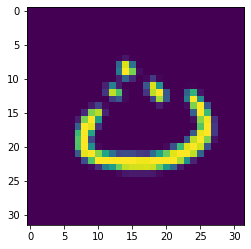


Class = 5


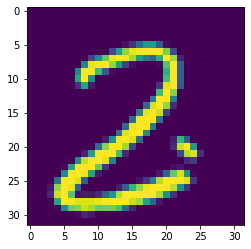


Class = 6


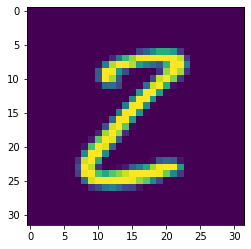


Class = 7


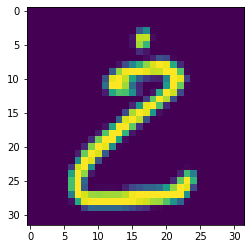


Class = 8


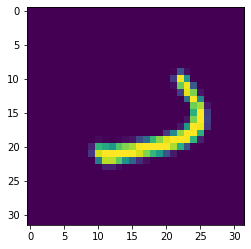


Class = 9


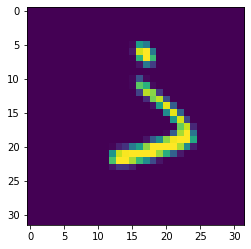


Class = 10


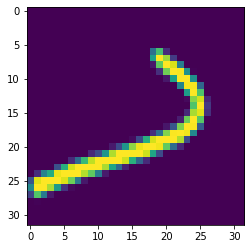


Class = 11


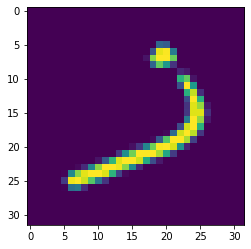


Class = 12


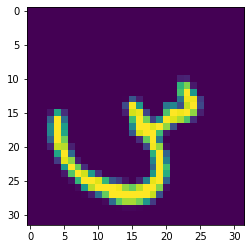


Class = 13


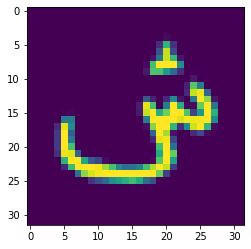


Class = 14


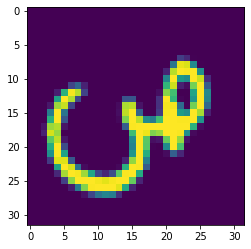


Class = 15


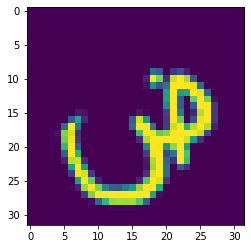


Class = 16


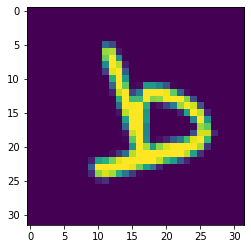


Class = 17


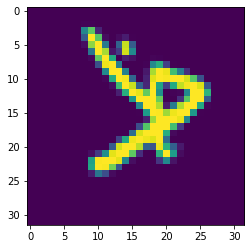


Class = 18


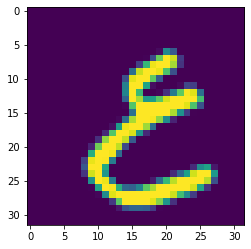


Class = 19


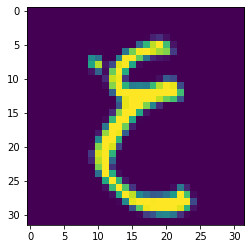


Class = 20


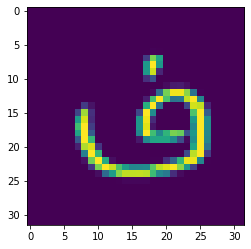


Class = 21


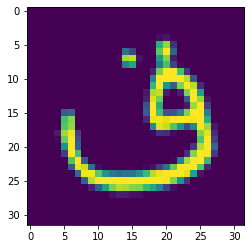


Class = 22


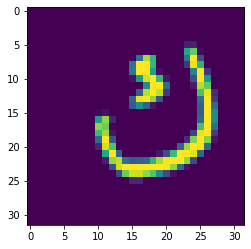


Class = 23


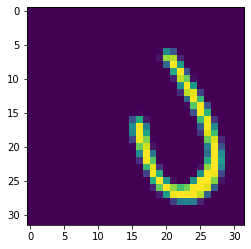


Class = 24


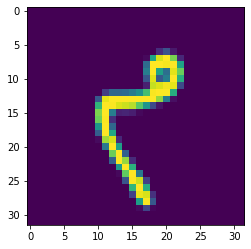


Class = 25


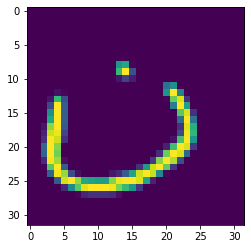


Class = 26


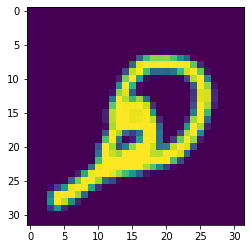


Class = 27


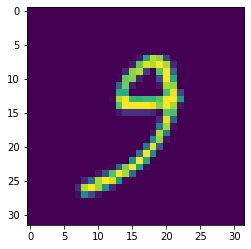


Class = 28


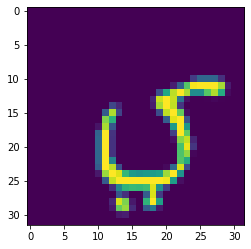

In [291]:
trainImages = pd.read_csv('dataset/TrainImgs.csv')
trainLabels = pd.read_csv('dataset/TrainLabels.csv')
testImages = pd.read_csv('dataset/TestImgs.csv')
testLabels = pd.read_csv('dataset/TestLabels.csv')

mainTrainImgs = deepcopy(trainImages)

trainImages = trainImages.to_numpy()
trainImages = trainImages.reshape((trainImages.shape[0], 32, 32))

for i in range(1, 29) :
    print(f'Class = {i}')
    index = np.where(trainLabels == i)
    plt.imshow(trainImages[index[0][0]].T)
    plt.show()
    print()


<div dir = "rtl" style="font-size: 16px;">
    ۲−
</div>

In [292]:
mainTrainImgs.describe()

,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,...,0.896,0.897,0.898,0.899,0.900,0.901,0.902,0.903,0.904,0.905
count,13439.000000,13439.000000,13439.000000,13439.000000,13439.000000,13439.000000,13439.000000,13439.000000,13439.000000,13439.000000,...,13439.000000,13439.000000,13439.000000,13439.000000,13439.000000,13439.000000,13439.000000,13439.000000,13439.000000,13439.000000
mean,0.121586,0.021356,0.009748,0.011310,0.019049,0.005358,0.005060,0.020909,0.033336,0.042712,...,0.302478,0.221147,0.240792,0.295111,0.373540,0.355086,0.293102,0.242131,0.306198,0.931096
std,2.832441,0.956054,0.699952,0.826084,2.199682,0.621082,0.552609,1.438761,2.336339,2.397652,...,6.420739,4.900747,5.456882,5.841303,7.395312,7.146457,5.845893,4.902245,5.348775,8.753849
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,128.000000,81.000000,59.000000,87.000000,255.000000,72.000000,64.000000,151.000000,236.000000,172.000000,...,255.000000,247.000000,255.000000,251.000000,255.000000,255.000000,244.000000,241.000000,224.000000,255.000000



<div dir = "rtl" style="font-size: 16px;">
    با توجه به مقادیر ماکسیمم و مینیممی که در جدول بالا داریم
    <br>
    <br>
    هر پیکسل بین ۰ تا ۲۵۵ است.
</div>


<div dir = "rtl" style="font-size: 16px;">
    ۳−
</div>

In [293]:
print(f'Train Images Count = {len(mainTrainImgs)}, Test Images Count = {len(testImages)}, Classes Count = {trainLabels.nunique()[0]}')

Train Images Count = 13439, Test Images Count = 3359, Classes Count = 28



<div dir = "rtl" style="font-size: 16px;">
    ۴−
</div>

In [294]:
train_data = deepcopy(mainTrainImgs)
train_data['labels'] = deepcopy(trainLabels)

train_data = train_data[(train_data['labels'] <= 16)]

x_train = train_data.drop('labels', axis = 1)
y_train = train_data['labels']

test_data = deepcopy(testImages)
test_data['labels'] = deepcopy(testLabels)

test_data = test_data[(test_data['labels'] <= 16)]

x_test = test_data.drop('labels', axis = 1)
y_test = test_data['labels']

y_train = y_train.to_frame()
y_test = y_test.to_frame()



<div dir = "rtl" style="font-size: 16px;">
    ۵−
</div>

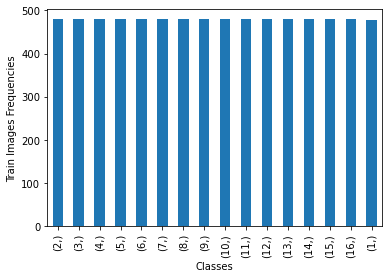

Images Count In Train = 7679


In [295]:
y_train.value_counts().plot.bar()
plt.xlabel('Classes')
plt.ylabel('Train Images Frequencies')
plt.show()
print(f'Images Count In Train = {len(y_train)}')

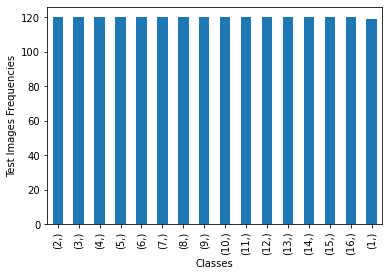

Images Count In Test = 1919


In [296]:
y_test.value_counts().plot.bar()
plt.xlabel('Classes')
plt.ylabel('Test Images Frequencies')
plt.show()
print(f'Images Count In Test = {len(y_test)}')


<div dir = "rtl" style="font-size: 16px;">
    ۶−
</div>

In [297]:
x_train = x_train / 255
x_test = x_test / 255

<div dir = "rtl" style="font-size: 16px;">
    در صورت انجام ندادن این کار تأثیر پیکسل ها با اعداد بزرگ، بسیار بیشتر خواهد شد که باعث کاهش دقت می‌شود.
</div>


<div dir = "rtl" style="font-size: 16px;">
    ۷−
</div>

In [298]:

y_train_one_hot_encoded = pd.DataFrame(OneHotEncoder().fit_transform(y_train).toarray())
y_test_one_hot_encoded = pd.DataFrame(OneHotEncoder().fit_transform(y_test).toarray())


<div dir = "rtl" style="font-size: 16px;">
    به این دلیل one hot می‌کنیم که وقتی یک ستون categorical مانند ۱ ۲ ۳ ۴
    <br>
    <br>
    داریم، این ستون به نوعی ordinal است و ترتیب در آن مهم است ولی وقتی one hot
    <br>
    <br>
    را انجام دهیم، ترتیب مهم نیست. هم چنین در لایه آخر شبکه عصبی ۱۶ نورون گذاشتیم
    <br>
    <br>
    که هر یک از یک ستون one hot می‌شوند و هر کدام بیشتر باشند، به عنوان جواب اعلام خواهند شد.
</div>

# Phase 2 : Completing The Code

# Dataloader

In [299]:
class Dataloader:
    '''
    This class prepares the dataset for the neural network.
    '''
    
    def __init__(self, data, labels, n_classes, batch_size=None, shuffle=False):
        '''
        This is the constructor. It gets dataset information and initializes the 
        Dataloader class fields.
            Parameters:
                data: features your dataset in pandas.Dataframe format.
                labels: labels of your dataset in pandas.Dataframe format.
                n_classes: number of classes you have in your dataset.
                batch_size: the number of samples that will be propagated through the network.
                shuffle: boolean value indicating whether or not the dataset should be shuffled
        '''

        assert len(data) == len(labels)
        
        self.__n_classes = n_classes
        self.__batch_size = batch_size
        self.__shuffle = shuffle
        self.__data = data
        self.__onehot_labels = self.__onehot(labels, self.__n_classes)
    
    def __onehot(self, labels, n_classes):
        '''
        This private method gets labels and provides one_hot vectors of labels.
        For categorical variables where no such ordinal relationship exists,
        the integer encoding is not enough.
        In this case, a one-hot encoding can be applied to the integer representation.
        This is where the integer encoded variable is removed, and a new binary variable is
        added for each unique integer value.
        example:
            red,    green,    blue
            1,      0,        0
            0,      1,        0
            0,      0,        1
                Parameters:
                        label: lables of your dataset in pandas.Dataframe format.
                        n_classes: number of classes you have in your dataset.
                
                Returns:
                    onehot_vectors: onehot vectors of the labels
        '''
        # TODO: Implement
        onehot_vectors = pd.DataFrame(OneHotEncoder().fit_transform(labels).toarray())
        return onehot_vectors
    
    def __shuffle_dataset(self):
        '''
        This private method shuffles your dataset.
        It uses data and onehot_labels to shuffle them
        symmetrical.
        '''
        # TODO: Implement
        permutation = np.random.permutation((self.__data.shape[0]))
        self.__data = self.__data[permutation]
        self.__onehot_labels = self.__onehot_labels[permutation]
    
    def __iter__(self):
        '''
        The __iter__() function returns an iterator for the
        given object (array, set, tuple, etc., or custom objects).
        This will return your dataset in the batch_size given. This should
        be used to provide data for the neural network.
        '''
        
        if self.__shuffle:
            self.__shuffle_dataset()
            
        if self.__batch_size==None:
            yield (np.matrix(self.__data), np.matrix(self.__onehot_labels))
            return
            
        for idx in range(0, len(self.__data), self.__batch_size):
            yield (np.matrix(self.__data[idx:idx + self.__batch_size]), 
                   np.matrix(self.__onehot_labels[idx : idx + self.__batch_size]))

# Activation Functions

In [300]:
class Identical:
    '''
    This is the Identical activation function. This activation function just
    return the value it gets.
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        As this is an identical activity function, it just 
        returns np.matrix of the input.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_value: np.matrix of input with float datatypes
        '''
        identical_value = np.matrix(matrix, dtype=float)
        return identical_value

    def derivative(self, matrix):
        '''
        This method returns the derivation of the input.
        As the derivation of x is one, this method returns
        a matrix of one with the shape of the input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                identical_derivative: np.matrix of ones with matrix shape
        '''
        temp = np.matrix(matrix, dtype=float)
        identical_derivative = np.matrix(np.full(np.shape(temp), 1.))
        return identical_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _value method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    

class Relu:
    '''
    This is the Relu activation function. 
    The rectified linear activation function or ReLU for short
    is a piecewise linear function that will output the input directly
    if it is positive, otherwise, it will output zero.
    '''
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set 0 in the matrix if the value is less than 0 else, it returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype = float)
        relu_value = np.maximum(0, temp)
        return relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_derivative: np.matrix of relu activation function derivation result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype = float)
        relu_derivative = np.matrix(np.full(np.shape(temp), np.where(temp >= 0, 1, 0)))
        return relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _relu method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __relu(matrix): __relu return value for the input matrix
        '''
        return self.__val(matrix)

    
class LeakyRelu:
    '''
    This is the Leaky Relu activation function. 
    Leaky Rectified Linear Unit, or Leaky ReLU,
    is a type of activation function based on a ReLU,
    but it has a small slope for negative values instead
    of a flat slope.
    '''
    
    def __init__(self, negative_slope=0.01):
        '''
        This is the constructor.
        It sets negative_slope field.
            Parameters:
                negative_slope: slope for negative input values
        '''
        self.negative_slope = 0.01
    
    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It will set negative_slope*value in the matrix if the value is less than 0, else it
        returns the value itself.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype = float)
        leaky_relu_value = np.where(temp < 0, temp * self.negative_slope, temp)
        return leaky_relu_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of leaky relu function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                leacky_relu_derivative: np.matrix of leaky relu activation function derivation result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype = float)
        leacky_relu_derivative = np.matrix(np.full(np.shape(temp), np.where(temp >= 0, 1, self.negative_slope)))
        return leacky_relu_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

    
class Sigmoid:
    '''
    A sigmoid function is a mathematical function having a
    characteristic "S"-shaped curve or sigmoid curve.
    It return S(x)=1/(1+e^-x)
    '''
    
    def __init__(self) :
        pass

    def __val(self, matrix) :
        '''
        Returns 1/(1+e^-x) of values
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        sigmoid_value =  (1 / (1 + np.exp(-matrix)))
        return sigmoid_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of sigmoid function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of sigmoid activation function derivation result
        '''
        # TODO: Implement
        temp = np.matrix(matrix, dtype = float)
        temp = self.__val(temp)
        sigmoid_derivative = np.multiply(temp, (1 - temp))
        return sigmoid_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)


class Softmax:
    '''
    The softmax function, also known as softargmax  or normalized
    exponential function is a generalization of the logistic
    function to multiple dimensions. It is used in multinomial logistic
    regression and is often used as the last activation function of a neural
    network to normalize the output of a network to a probability distribution
    over predicted output classes, based on Luce's choice axiom.
    Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
    '''
        
    def __init__(self) :
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the softmax on that.
        Softmax return (e^x_i / (Σe^x_j for j = 1, ..., J))
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                relu_value: np.matrix of relu activation function result
        '''
        # TODO: Implement
        def softmax(row):
            exp = np.exp(row - np.max(row))
            return exp / np.sum(exp)
        softmax_value = np.apply_along_axis(softmax, 1, matrix)
        return softmax_value

    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)
    
class Tanh:
    
    def __init__(self):
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, matrix):
        '''
        This private method gets a matrix and uses the activity function on that.
        It performs Tanh on the values.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                tanh_value: np.matrix of Tanh activation function result
        '''
        # TODO: Implement
        tanh_value =  np.tanh(matrix)
        return tanh_value

    def derivative(self, matrix):
        '''
        Returns the derivation value of Tanh function on input matrix.
        
            Parameters:
                matrix: np.matrix of values
            Returns:
                sigmoid_derivative: np.matrix of Tanh activation function derivation result
        '''
        # TODO: Implement
        tanh_derivative = 1 - np.power(np.tanh(matrix), 2)
        return tanh_derivative
    
    def __call__(self, matrix):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                matrix: np.matrix of values
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(matrix)

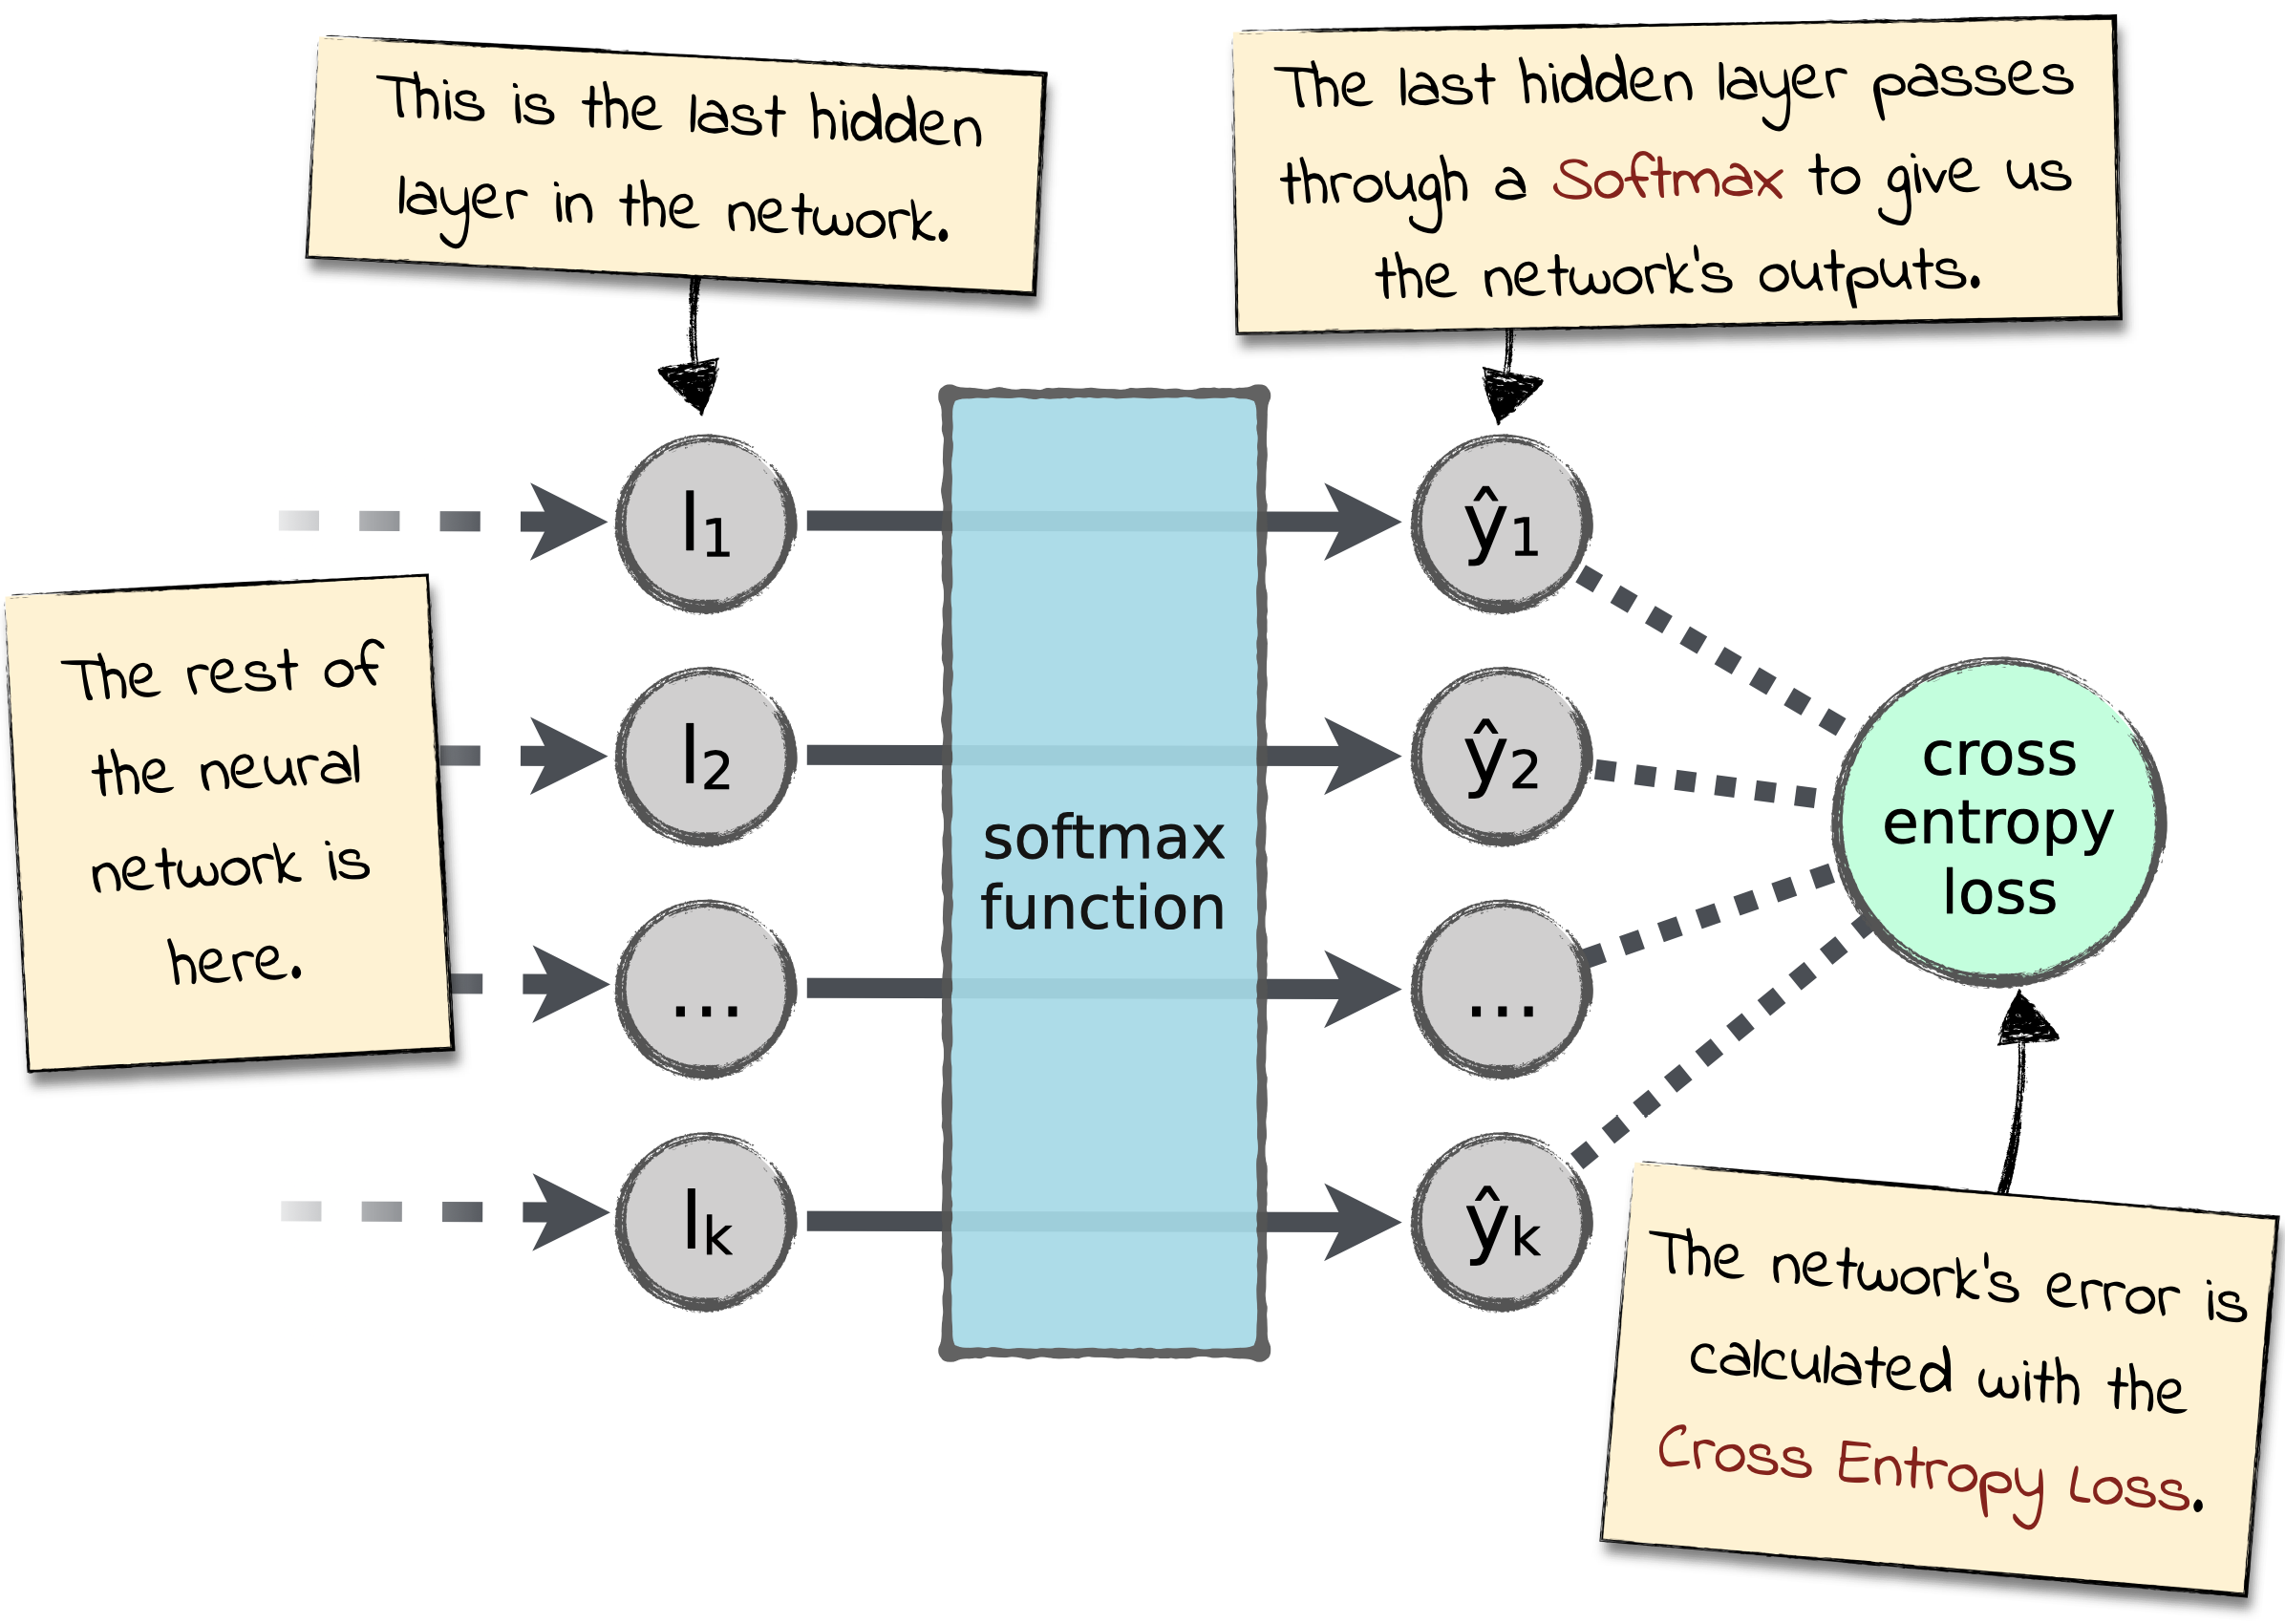

# Loss Function

In [301]:
class CrossEntropy: #(with softmax)
    '''
    Cross-entropy is a measure of the difference between two probability
    distributions for a given random variable or set of events. You might
    recall that information quantifies the number of bits required to encode
    and transmit an event.
    The above image can help you.
    '''
    
    def __init__(self): 
        '''
        This is the constructor. It does not have any fields
        as a result, there is no need to do anything in the constructor.
        '''
        pass

    def __val(self, true_val, expected_val):
        '''
        L(y^, y) = - Σ (y^(k)log (y^)^(k)) for k in K
        Parameters:
            true_val: calculated values (generated by neural network)
            expected_val: real values in dataset
        Returns:
            cross_entropy_value: cross entropy of inputs
        '''

        assert np.shape(true_val)==np.shape(expected_val)

        # TODO: Implement
        temp = np.matrix(true_val, dtype = float)
        output = np.log(Softmax()(temp))
        expected = np.matrix(expected_val, dtype = float)

        cross_entropy_value =  -1 * np.sum(np.multiply(expected, output), axis = 1)
        
        return cross_entropy_value
        
    def derivative(self, true_val, expected_val):
        '''
        Returns derivation of cross entropy.
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                cross_entropy_derivative: cross entropy derivation of inputs
        '''

        assert np.shape(true_val) == np.shape(expected_val)

        # TODO: Implement
        temp = np.matrix(true_val, dtype = float)
        cross_entropy_derivative = Softmax()(temp) - np.matrix(expected_val, dtype = float)
        
        return cross_entropy_derivative
    
    def __call__(self, true_val, expected_val):
        '''
        __call__ is a special function in Python that, when implemented inside a class,
        gives its instances (objects) the ability to behave like a function.
        Here we return the _val method output.
            
            Parameters:
                true_val: calculated values (generated by neural network)
                expected_val: real values in dataset
            Returns:
                __val(matrix): __val return value for the input matrix
        '''
        return self.__val(true_val, expected_val)

# Layer

In [315]:
class Layer:
    '''
    The layer class is used to define neural network layers.
    It stores all needed information for each layer, such as neurons count,
    weight matrix, bias, the output after applying the activation function, etc.
    '''

    DEFAULT_LOW, DEFAULT_HIGH, DEFAULT_MEAN, DEFAULT_VAR = 0, 0.05, 0., 1.

    def __init__(self, input_size, output_size, activation = Identical(), initial_weight = 'uniform', 
                 **initializing_parameters) :
        '''
        Parameters:
            input_size: the size of the input of this layer.
            output_size: the size of the output after this layer.
            activation: the activation function. It can be initialized to either of the previously defined activation classes.
                        default is an Identical activation function.
            initial_weight: either normal or uniform. It defines the method for weight initialization.
        '''
        
        assert type(initial_weight) == str, 'Undefined activation function!'
        
        self.__weight_initializer_dict = {'uniform' : self.__uniform_weight, 'normal' : self.__normal_weight}
        
        assert initial_weight in self.__weight_initializer_dict, 'Undefined weight initialization function!'


        self.__n_neurons = output_size
        weight_initializer = self.__weight_initializer_dict[initial_weight]
        self.__weight = weight_initializer(input_size, self.__n_neurons, **initializing_parameters)
        self.__bias = weight_initializer(1, self.__n_neurons, **initializing_parameters)
        self.__activation = activation
        
        self.__last_input = None
        self.__last_activation_input = None
        self.__last_activation_output = None
        self.__last_activation_derivative = None
        
    def forward(self, layer_input):
        '''
        It calculates the output of this layer for the layer_input argument.
        This method also stores __last_input, __last_activation_input, and __last_activation_derivative
        for future use in backpropagation.
        Parameters:
            layer_input: 2d np.matrix representing the input matrix of this layer.
        Returns:
            Final output of this layer after applying the activation function.
        '''
        assert np.ndim(layer_input)==2
        assert np.size(self.__weight,0) == np.size(layer_input,1)
        # TODO: Implement
        
        self.__last_input = np.matrix(layer_input, dtype = float)
        self.__last_activation_input = np.add(np.dot(self.__last_input, self.__weight), self.__bias)

        self.__last_activation_output = self.__activation(self.__last_activation_input)

        self.__last_activation_derivative = self.__activation.derivative(self.__last_activation_input)
        
        return self.__last_activation_output
    
    def update_weights(self, backprop_tensor, lr):
        '''
        It updates Layer weights according to the backpropagation matrix and learning rate.
        This method updates bias values as well.
        Parameters:
            backprop_tensor: 2d np.matrix passed from the next layer containing gradient values.
            lr: learning rate
        Returns:
            backprop_tensor to be used by the previous layer.
        '''
        assert np.ndim(backprop_tensor)==2
        assert np.size(backprop_tensor,0) == np.size(self.__last_activation_derivative,0)
        assert np.size(backprop_tensor,1) == self.__n_neurons
        # TODO: Implement

        ones = np.matrix(np.ones((np.size(backprop_tensor,axis = 0), 1)))

        dy = np.multiply(backprop_tensor, self.__last_activation_derivative)
        db = np.matmul(ones.T, dy)
        dw = np.matmul(self.__last_input.T, dy)
        
        backprop_tensor = np.matmul(dy, np.transpose(self.__weight))

        self.__weight -= lr * dw
        self.__bias -= lr * db

        return backprop_tensor

    def __uniform_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a uniform distribution between low and high values.
        It uses default low and high values unless low or high are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom low or high values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using uniformly distributed values.
        '''
        low, high = self.DEFAULT_LOW, self.DEFAULT_HIGH
        if 'low' in initializing_parameters.keys(): low = initializing_parameters['low']
        if 'high' in initializing_parameters.keys(): high = initializing_parameters['high']
        # TODO: Implement
        weights = np.matrix(np.random.uniform(low = low, high = high, size = (dim1, dim2)))
        return weights

    def __normal_weight(self, dim1, dim2, **initializing_parameters):
        '''
        Initializes weights as a normal distribution with mean and var values.
        It uses default mean and variance values unless mean or var are passed in initializing_parameters.
        Parameters:
            dim1: the size of the first dimension of weights.
            dim2: the size of the second dimension of weights.
            initializing_parameters: other initializing parameters; it can include custom mean or var values.
        Returns:
            np.matrix with size (dim1, dim2) initialized using normaly distributed values.
        ''' 
        mean, var = self.DEFAULT_MEAN, self.DEFAULT_VAR
        if 'mean' in initializing_parameters.keys(): mean = initializing_parameters['mean']
        if 'var' in initializing_parameters.keys(): var = initializing_parameters['var']
        # TODO: Implement
        weights = np.matrix(np.random.normal(loc = mean, scale = np.sqrt(var), size = (dim1, dim2)))
        return weights
    
    @property
    def n_neurons(self): return self.__n_neurons
    
    @property
    def weight(self): return self.__weight
    
    @property
    def bias(self): return self.__bias
    
    @property
    def activation(self): return self.__activation

# Feed Forward Neural Network

In [303]:
class FeedForwardNN:
    '''
    This class is used in order to implement custom feed-forward neural networks.
    The FeedForwardNN class stores a list of layers that determines all network layers.
    It also consists of the learning rate and loss function.
    '''
    def __init__(self, input_shape):
        '''
        Parameters:
            input_shape: the size of the first input to our neural network.
        '''
        
        self.__input_shape = input_shape
        self.__output_shape = None
        
        self.__layers_list = []
        
        self.__lr = None
        self.__loss = None

        
    def add_layer(self, n_neurons, activation=Relu(), initial_weight='uniform', **initializing_parameters):
        '''
        This method adds a new custom layer to the layers_list.
        Parameters:
            n_neurons: number of neurons in this layer
            activation: the activation function of this layer, default is Relu
            initial_weight: either a uniform or normal, default is uniform
            initializing_parameters: other initializing parameters such as low, high, mean, var, etc
        '''

        assert type(n_neurons) == int, "Invalid number of neurons for the layer!"
        assert n_neurons > 0, "Invalid number of neurons for the layer!"
        
        n_prev_neurons = self.__input_shape if len(self.__layers_list)==0 else self.__layers_list[-1].n_neurons
        new_layer = Layer(n_prev_neurons, n_neurons, activation, initial_weight, **initializing_parameters)
        self.__layers_list.append(new_layer)
        self.__output_shape = self.__layers_list[-1].n_neurons 

    
    def set_training_param(self, loss=CrossEntropy(), lr=1e-3):
        '''
        This method is used to set training parameters.
        Parameters:
            loss: loss function, default is CrossEntropy
            lr: learning rate, default is 1e-3
        '''
        assert self.__layers_list, "Uncomplete model!"
        self.__loss = loss
        self.__lr = lr
    
    
    def forward(self, network_input):
        '''
        This method calculates the output of the complete neural network for a passed input.
        Parameters:
            network_input: input of the neural network
        Returns:
            network_output: output of the neural network after forwarding the network_input
        '''
        assert type(self.__output_shape) != None, "Model is not compiled!"
        
        # TODO: Implement
        network_output = network_input
        for layer in self.__layers_list:
            network_output = layer.forward(network_output)

        return network_output
    
    
    def fit(self, epochs, trainloader, testloader=None, print_results=True):
        '''
        This method trains the neural network using specified parameters.
        It runs the __train private method epoch times and fills the log dictionary.
        Parameters:
            epochs: number of epochs to run
            trainloader: DataLoader for train data
            testloader: DataLoader for test data
            print_results: whether or not to print the results
        Returns:
            log: complete log of the training process as a dictionary consisting of
            train_accuracy, train_loss, test_accuracy, test_loss
        '''
        
        assert type(self.__output_shape) != None, "Model is not compiled!"
        assert type(self.__lr) != None and type(self.__loss) != None, "Training paramenters are not set!"

        log = {"train_accuracy":[], "train_loss":[], "test_accuracy":[], "test_loss":[]}
        
        for epoch in range(1, epochs+1):
            
            if print_results: 
                print('Epoch {}:'.format(epoch)) 
                
            average_accuracy, average_loss = self.__train(trainloader)
            log['train_accuracy'].append(average_accuracy)
            log['train_loss'].append(average_loss)
            if print_results:
                print('\tTrain: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
            
            if type(testloader) != type(None):
                average_accuracy, average_loss = self.__test(testloader)
                log['test_accuracy'].append(average_accuracy)
                log['test_loss'].append(average_loss)
                if print_results:
                    print('\tTest: Average Accuracy: {}\tAverage Loss: {}'.format(average_accuracy, average_loss))
                    
        return log

    
    def __train(self, trainloader):
        '''
        Trains the neural network for one epoch.
        Parameters:
            trainloader: A DataLoader consisting of train data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_train, y_train in trainloader:
            batch_accuracy, batch_loss = self.__train_on_batch(x_train, y_train)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)
    
    
    def __test(self, testloader):
        '''
        Test the neural network using a testloader.
        Parameters:
            testloader: A DataLoader of test data
        Returns:
            batch_accuracy, batch_loss: mean of all batch_accuracies, batch_losses
        '''
        bach_accuracies, batch_losses = [], []
        for x_test, y_test in testloader:
            batch_accuracy, batch_loss = self.__test_on_batch(x_test, y_test)
            bach_accuracies.append(batch_accuracy)
            batch_losses.append(batch_loss)
        return np.mean(bach_accuracies), np.mean(batch_losses)

    
    def __train_on_batch(self, x_batch, y_batch):
        '''
        Trains the neural network for one batch of train data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''
        # TODO: Implement
        batch_output = self.forward(x_batch)
        batch_accuracy = self.__compute_accuracy(batch_output, y_batch)
        batch_average_loss = np.mean(self.__loss(batch_output, y_batch))

        self.__update_weights(batch_output, y_batch)

        return (batch_accuracy, batch_average_loss)
        
        
    def __test_on_batch(self, x_batch, y_batch):
        '''
        Tests the neural network for one batch of test data.
        Parameters:
            x_batch: one batch data
            y_batch: labels for one batch
        Returns:
            (batch_accuracy, batch_average_loss)
        '''  
        # TODO: Implement
        batch_output = self.forward(x_batch)

        batch_accuracy = self.__compute_accuracy(batch_output, y_batch)
        batch_average_loss = np.mean(self.__loss(batch_output, y_batch))
        
        return (batch_accuracy, batch_average_loss)
            
        
    def __get_labels(self, outputs):
        '''
        Parameters:
            outputs: output of the neural network
        Returns:
            labels: labels generated from the outputs of the neural network
        '''
        # TODO: Implement
        labels = outputs.argmax(1)
        return labels
    
    
    def __compute_accuracy(self, output, expected_output):
        '''
        Computes accuracy by comparing output and expected_output.
        Parameters:
            output: actual output of the neural network
            expected_output: expected output
        Returns:
            accuracy
        '''
        # TODO: Implement
        output = self.__get_labels(output)
        ans = self.__get_labels(expected_output)
        accuracy = accuracy_score(ans, output)
        return accuracy
    
    
    def __update_weights(self, output, y_train):
        '''
        Updates weights of all layers according to neural network output and labels.
        Parameters:
            output: output of the neural network
            y_train: y labels for one batch of train data
        Returns:
            None
        '''
        # TODO: Implement
        backpropagation_tensor = self.__loss.derivative(output, y_train)
        for layer in reversed(self.__layers_list):
            backpropagation_tensor = layer.update_weights(backpropagation_tensor, self.__lr)
        return

# Phase 3 : Data Classification

In [304]:
INPUT_SHAPE = 32 * 32
LEARNING_RATE = 0.005
EPOCHS = 100
BATCH_SIZE = 32

# Part 1 : Training The Network

In [316]:
def train_model(activation = Relu(), initial = 'uniform', print_results = True, lr = LEARNING_RATE, epochs = EPOCHS, batch_size = BATCH_SIZE) :
    
    TRAINLOADER = [batch for batch in Dataloader(x_train, y_train, n_classes = 16, batch_size = batch_size, shuffle = False)]
    TESTLOADER = [batch for batch in Dataloader(x_test, y_test, n_classes = 16, batch_size = batch_size, shuffle = False)]

    network = FeedForwardNN(INPUT_SHAPE)
    network.add_layer(n_neurons = 60, activation = activation, initial_weight = initial)
    network.add_layer(n_neurons = 16, activation = Identical(), initial_weight = initial)
    network.set_training_param(loss = CrossEntropy(), lr = lr)

    log = network.fit(epochs, TRAINLOADER, TESTLOADER, print_results = print_results)
    return log

In [317]:
log = train_model()

Epoch 1:
	Train: Average Accuracy: 0.11341565860215054	Average Loss: 2.7537624490419925
	Test: Average Accuracy: 0.30640120967741935	Average Loss: 2.114514298404736
Epoch 2:
	Train: Average Accuracy: 0.33115759408602147	Average Loss: 1.933945901961145
	Test: Average Accuracy: 0.398622311827957	Average Loss: 1.7247751966831217
Epoch 3:
	Train: Average Accuracy: 0.4340221774193548	Average Loss: 1.5937555258147609
	Test: Average Accuracy: 0.45751008064516124	Average Loss: 1.5302272507581884
Epoch 4:
	Train: Average Accuracy: 0.49484206989247315	Average Loss: 1.4004387307342843
	Test: Average Accuracy: 0.5122647849462365	Average Loss: 1.392168346712025
Epoch 5:
	Train: Average Accuracy: 0.5309265793010752	Average Loss: 1.265004407504451
	Test: Average Accuracy: 0.5471942204301075	Average Loss: 1.295257484588507
Epoch 6:
	Train: Average Accuracy: 0.5728662634408602	Average Loss: 1.1589001177908533
	Test: Average Accuracy: 0.5560147849462366	Average Loss: 1.2392852953388882
Epoch 7:
	Train: 

# Part 2 : Initial Weighting

<div dir = "rtl" style="font-size: 16px;">
    وقتی تمام وزن ها صفر باشند، مشتقات هم ثابت خواهند ماند. در نتیجه نورون ها هم ویژگی‌های یکسانی
    <br>
    <br>
    یاد می‌گیرند.به همین علت دقت تقریبا در تمام epoch ها ثابت می‌ماند. و چون ویژگی های یکسانی یاد گرفته‌ایم
    <br>
    <br>
    مدل به درستی آموزش نمی‌بیند و در نتیجه دقت مدل هم کاهش می‌یابد.
</div>

# Part 3 : Learning Rate

learning rate = 0.05

In [318]:
log = train_model(activation=Relu(), initial='uniform', print_results=True, lr=LEARNING_RATE * 10)

Epoch 1:
	Train: Average Accuracy: 0.00013020833333333333	Average Loss: 3.4796097297417723
	Test: Average Accuracy: 0.06253360215053763	Average Loss: 2.7793704332754054
Epoch 2:
	Train: Average Accuracy: 0.0	Average Loss: 2.9194871361476955
	Test: Average Accuracy: 0.06253360215053763	Average Loss: 2.7793704332751465
Epoch 3:
	Train: Average Accuracy: 0.0	Average Loss: 2.9194871361476826
	Test: Average Accuracy: 0.06253360215053763	Average Loss: 2.7793704332751465
Epoch 4:
	Train: Average Accuracy: 0.0	Average Loss: 2.9194871361476826
	Test: Average Accuracy: 0.06253360215053763	Average Loss: 2.7793704332751465
Epoch 5:
	Train: Average Accuracy: 0.0	Average Loss: 2.9194871361476826
	Test: Average Accuracy: 0.06253360215053763	Average Loss: 2.7793704332751465
Epoch 6:
	Train: Average Accuracy: 0.0	Average Loss: 2.9194871361476826
	Test: Average Accuracy: 0.06253360215053763	Average Loss: 2.7793704332751465
Epoch 7:
	Train: Average Accuracy: 0.0	Average Loss: 2.9194871361476826
	Test: Av

<div dir = "rtl" style="font-size: 16px;">
    همان طور که مشاهد می‌شود با افزایش زیاد نرخ یادگیری، دقت مدل هم به شدت کاهش می‌یابد.
</div>

learning rate = 0.0005

In [319]:
log = train_model(activation=Relu(), initial='uniform', print_results=True, lr=LEARNING_RATE * 0.1)

Epoch 1:
	Train: Average Accuracy: 0.022135416666666668	Average Loss: 2.874464670614764
	Test: Average Accuracy: 0.06253360215053763	Average Loss: 2.7132834177026597
Epoch 2:
	Train: Average Accuracy: 0.04375	Average Loss: 2.7943080634385145
	Test: Average Accuracy: 0.09694220430107527	Average Loss: 2.613213964338036
Epoch 3:
	Train: Average Accuracy: 0.10666162634408602	Average Loss: 2.624661924429039
	Test: Average Accuracy: 0.16881720430107527	Average Loss: 2.4284335560763366
Epoch 4:
	Train: Average Accuracy: 0.1651419690860215	Average Loss: 2.43203934164989
	Test: Average Accuracy: 0.2485215053763441	Average Loss: 2.270671207939041
Epoch 5:
	Train: Average Accuracy: 0.2350680443548387	Average Loss: 2.276581062094139
	Test: Average Accuracy: 0.2917674731182796	Average Loss: 2.1322760705451933
Epoch 6:
	Train: Average Accuracy: 0.295354502688172	Average Loss: 2.140618604850649
	Test: Average Accuracy: 0.3277217741935484	Average Loss: 2.0155359697093647
Epoch 7:
	Train: Average Accur

<div dir = "rtl" style="font-size: 16px;">
    همان طور که مشاهده می‌شود با کاهش نرخ یادگیری، دقت مدل افزایش می‌یابد ولی زمان بیشتری برای یادگیری
    <br>
    <br>
    صرف خواهد شد. چرا که مدل به epoch های بیشتری برای رسیدن به دقت یکسان برای نرخ یادگیری بهینه نیاز دارد.
</div>

<div dir = "rtl" style="font-size: 20px;">
    پیدا کردن نرخ یادگیری بهینه :
</div>

In [320]:
learning_rates = [i * 0.001 for i in range(2, 9)]

for learning_rate in learning_rates :
    log = train_model(activation=Relu(), initial='uniform', print_results=False, lr=learning_rate)
    train_accuracy, test_accuracy = log['train_accuracy'][-1], log['test_accuracy'][-1]
    print(f'for learning rate = {learning_rate} : train accuracy = {train_accuracy}, test accuracy = {test_accuracy}')

for learning rate = 0.002 : train accuracy = 0.9977864583333333, test accuracy = 0.7232358870967741
for learning rate = 0.003 : train accuracy = 0.9997395833333333, test accuracy = 0.7227486559139785
for learning rate = 0.004 : train accuracy = 1.0, test accuracy = 0.7508736559139785
for learning rate = 0.005 : train accuracy = 0.9998697916666667, test accuracy = 0.7367943548387097
for learning rate = 0.006 : train accuracy = 1.0, test accuracy = 0.7216229838709677
for learning rate = 0.007 : train accuracy = 0.9998697916666667, test accuracy = 0.7247647849462365
for learning rate = 0.008 : train accuracy = 1.0, test accuracy = 0.7258064516129032


<div dir = "rtl" style="font-size: 16px;">
    همان طور که مشاهده می‌شود بیشترین میزان دقت برای نرخ یادگیری ۰٫۰۰۴ رخ می‌دهد.
</div>

In [321]:
LEARNING_RATE = 0.004

# Part 4 : Activation Functions

In [325]:
functions = {'Sigmoid' : Sigmoid(), 'Hyperbolic Tangent' : Tanh(), 'Leaky Relu' : LeakyRelu()}

for function in functions :
    log = train_model(activation = functions[function], initial = 'uniform', print_results = False, lr = LEARNING_RATE)
    train_accuracy, test_accuracy = log['train_accuracy'][-1], log['test_accuracy'][-1]
    print(f'for activation function = {function} : train accuracy = {train_accuracy}, test accuracy = {test_accuracy}')

for activation function = Sigmoid : train accuracy = 0.9394447244623656, test accuracy = 0.7446404569892473
for activation function = Hyperbolic Tangent : train accuracy = 1.0, test accuracy = 0.7320900537634408
for activation function = Leaky Relu : train accuracy = 1.0, test accuracy = 0.7373487903225807


<div dir = "rtl" style = "font-size: 16px;">
    از بین activation function های موجود، Hyperbolic Tangent کمترین دقت را دارد،
    <br>
    <br>
    تابع Sigmoid نیز نسبت به Leaky Relu دقت کمتری دارد.
    <br>
    <br>
    پس تابع Leaky Relu بهترین عملکرد را دارد.
    <br>
    <br>
    دلیل نامناسب بودن Sigmoid , Tanh :
    <br>
    <br>
    این دو تابع وقتی مقادیر بسیار زیاد یا بسیار کم را دریافت کنند، مشتقشان در این نقاط تقریبا برابر صفر می‌شود. در نتیجه هنگام train
    <br>
    <br>
    کردن مدل با مشتق گیری زنجیره ای، تأثیر مشتق این توابع تقریبا صفر می‌شود و مدل به درستی آموزش نمی‌بیند.
    <br>
    <br>
    برتری Leaky Relu نسبت به Relu:
    <br>
    <br>
    هنگام استفاده از Relu ممکن است به مشکل Dead Relu
    <br>
    <br>
    برخورد کنیم که در آن برخی نورون ها ممکن است هیچگاه فعال نشوند و در نتیجه وزن هایی که
    <br>
    <br>
    به خروجی این نورون نسبت داده می‌شوند هیچگاه به روز رسانی نشوند.
    <br>
    <br>
    برای حل این مشکل از LeakyRelu استفاده می‌کنیم که دقیقا شبیه تابع Relu
    <br>
    <br>
    است با این تفاوت که به جای نسبت دادن صفر به ورودی های منفی، کسر کوچکی از این عدد منفی را به عنوان خروجی اعداد منفی انتخاب می‌کند.
    <br>
    <br>
    پس بهترین activation function برای مدل Leaky Relu است.
</div>

In [327]:
ACTIVATION = LeakyRelu()

# Part 5 : Batch Size

In [328]:
batch_sizes = [16, 256]

for batch_size in batch_sizes :
    log = train_model(activation = ACTIVATION, initial = 'uniform', print_results = False, lr = LEARNING_RATE,
                    epochs = EPOCHS, batch_size = batch_size)
    train_accuracy, test_accuracy = log['train_accuracy'][-1], log['test_accuracy'][-1]
    print(f'for batch size = {batch_size} : train accuracy = {train_accuracy}, test accuracy = {test_accuracy}')

for batch size = 16 : train accuracy = 0.9998697916666667, test accuracy = 0.7509374999999999
for batch size = 256 : train accuracy = 0.8476348039215686, test accuracy = 0.6016586183562992


<div dir = "rtl" style="font-size: 16px;">
    اندازه batch بزرگ تر دقت کمتری دارد. چرا که با اندازه batch بزرگ تر قدرت تعمیم
    <br>
    <br>
    مدل کاهش می‌یابد. در نتیجه overfit رخ می‌هد.
</div>

<div dir = "rtl" style="font-size: 16px;">
    مزیت استفاده از batch با اندازه کوچک:
    <br>
    <br>
    حافظه کمتری مصرف می‌کند. هم چنین قدرت تعمیم بیشتری دارد. در نتیجه در کل دقت بیشتری دارد.
    <br>
    <br>
    همچنین استفاده از batch های با اندازه کوچک تر همگرایی سریع تری به راه حل های بهینه دارد.
    <br>
    <br>
    چرا که به مدل اجازه می‌دهد قبل از دیدن همه داده ها شروع به یادگیری کند.
    <br>
    <br>
    معایب استفاده از batch با اندازه کوچک:
    <br>
    <br>
    استفاده از batch با اندازه کم هیچ تضمینی نمی‌دهد که حتما به جواب بهینه همگرا شویم
    <br>
    <br>
    بلکه همگرا شدن به جواب بهینه به نسبت اندازه batch به اندازه داده بستگی دارد.
    <br>
    <br>
    به همین خاطر معمولا توصیه می‌شود که با یک batch با اندازه کوچک شروع کنیم و اندازه آن
    <br>
    <br>
    را کم کم افزایش دهیم تا به اندازه ایده آل آن برسیم.
</div>

# Phase 4 : Using Tensorflow Library and Keras Interface

In [2]:
(x_train, y_train), (x_test, y_test) = tfk.datasets.cifar10.load_data()

# Part 1 : Data Preparing and Desining Neural Network

In [3]:
train_images = deepcopy(x_train)
train_labels = deepcopy(y_train)

test_images = deepcopy(x_test)
test_labels = deepcopy(y_test)

x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

x_train = (x_train - np.min(x_train)) / (np.max(x_train) - np.min(x_train))
x_test = (x_test - np.min(x_test)) / (np.max(x_test) - np.min(x_test))

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

In [4]:

def report_results(model, x_train, x_test, y_train, y_test):
    y_prediction = model.predict(x_train)
    y_prediction = np.argmax(y_prediction, axis=1)
    print("Train:")
    print(classification_report(y_train, y_prediction))

    y_prediction = model.predict(x_test)
    y_prediction = np.argmax(y_prediction, axis=1)
    print("Test:")
    print(classification_report(y_test, y_prediction))
    

def plot_results(history):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    plt.tight_layout()

    ax1.set_title("Accuracy")
    ax1.set_ylabel("Accuracy")
    ax1.set_xlabel("Epoch")
    ax1.plot(history.history['accuracy'], label="train")
    ax1.plot(history.history['val_accuracy'], label="test")
    ax1.legend()

    ax2.set_title("Loss")
    ax2.set_ylabel("Loss")
    ax2.set_xlabel("Epoch")
    ax2.plot(history.history['loss'], label="train")
    ax2.plot(history.history['val_loss'], label="test")
    ax2.legend()
    plt.show()

In [5]:
input_shape=[x_train.shape[1]]

model = models.Sequential()
model.add(layers.Dense(60, input_shape = input_shape, activation=activations.relu))
model.add(layers.Dense(40, activation=activations.relu))
model.add(layers.Dense(10, activation=activations.softmax))

model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss=losses.categorical_crossentropy, metrics=["accuracy"])

2023-01-31 09:32:11.285233: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-01-31 09:32:11.285643: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-01-31 09:32:11.285657: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (Javad-Bshrt): /proc/driver/nvidia/version does not exist
2023-01-31 09:32:11.286572: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 60)                184380    
                                                                 
 dense_1 (Dense)             (None, 40)                2440      
                                                                 
 dense_2 (Dense)             (None, 10)                410       
                                                                 
Total params: 187,230
Trainable params: 187,230
Non-trainable params: 0
_________________________________________________________________


<div dir = "rtl" style="font-size: 16px;">
    تعداد پارامتر های هر لایه بجز لایه اول برابر است با :
    <br>
    <br>
    ابعاد لایه (i-1) × ابعاد لایه (i) + ابعاد لایه i
    <br>
    <br>
    تعداد پارامترهای دومین لایه = ۴۰ × ۶۰ + ۶۰ = ۲۴۴۰
    <br>
    <br>
    تعداد پارامترهای سومین لایه = ۱۰ × ۴۰ + ۱۰ = ۴۱۰
</div>

In [7]:
model = models.Sequential()
model.add(layers.Dense(100, input_shape = input_shape, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dense(60, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dense(10, activation=activations.softmax))

model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss=losses.categorical_crossentropy, metrics=["accuracy"])

In [8]:
history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, batch_size=32)

Epoch 1/10


2023-01-31 07:34:37.130774: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 3s 2ms/step - loss: 1.9005 - accuracy: 0.3151 - val_loss: 1.7830 - val_accuracy: 0.3635
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7341 - accuracy: 0.3816 - val_loss: 1.6879 - val_accuracy: 0.3987
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6572 - accuracy: 0.4130 - val_loss: 1.6284 - val_accuracy: 0.4142
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6020 - accuracy: 0.4336 - val_loss: 1.6035 - val_accuracy: 0.4238
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5590 - accuracy: 0.4496 - val_loss: 1.5867 - val_accuracy: 0.4401
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5243 - accuracy: 0.4578 - val_loss: 1.5067 - val_accuracy: 0.4632
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.4939 - accuracy: 0.4664 - val_loss: 1.5508 - val_accuracy: 0.4407
Epo

In [9]:
report_results(model, x_train, x_test, y_train, y_test)

 124/1563 [=>............................] - ETA: 1s

2023-01-31 07:35:04.936982: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 1s 873us/step
Train:
              precision    recall  f1-score   support

           0       0.72      0.34      0.46      5000
           1       0.42      0.77      0.55      5000
           2       0.39      0.42      0.40      5000
           3       0.39      0.31      0.34      5000
           4       0.48      0.32      0.39      5000
           5       0.39      0.45      0.42      5000
           6       0.66      0.37      0.48      5000
           7       0.46      0.66      0.55      5000
           8       0.77      0.34      0.47      5000
           9       0.41      0.66      0.50      5000

    accuracy                           0.46     50000
   macro avg       0.51      0.46      0.46     50000
weighted avg       0.51      0.46      0.46     50000

313/313 [==============================] - 0s 725us/step
Test:
              precision    recall  f1-score   support

           0       0.72      0.34      0.46      1000
   

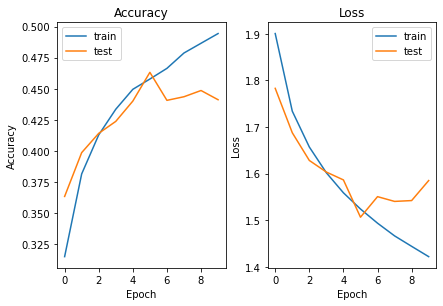

In [10]:
plot_results(history)

# Part 2 : Effect Of Hyper Parameters On Performance

# Optimizer :

<div dir = "rtl" style="font-size: 16px;">
    momentum یک تکنیک ساده است که باعث افزایش سرعت آموزش و هم چنین افزایش دقت مدل می‌شود.
    <br>
    <br>
    momentum برابر با میانگین مشتق هایی است که با گذر زمان تغییر می‌کنند و از آن برای به روز رسانی وزن ها در هر مرحله استفاده می‌کنیم.
    <br>
    <br>
    در حالت عادی در حین به روز رسانی وزن ها از حاصل ضرب learning rate در مشتق تابع ارور استفاده می‌کنیم. ولی هنگام استفاده از momentum در هر بار به روز رسانی وزن ها، از
    <br>
    <br>
    ضرب مقدار momentum در وزن ‌های قبلی نیز استفاده می‌کنیم. در نتیجه یک batch نمیتواند تأثیر زیادی داشته باشد و در نتیجه سریع تر به مقدار بهینه میل می‌کنیم.
    <br>
    <br>
    بزرگ بودن مقدار momentum با عث می‌شود مدل یک رفتاری تصادفی داشته باشد و به مقدار بهینه میل نکند و در نتیجه در فرایند یادگیری اختلال ایجاد می‌شود.
    <br>
    <br>
    همجنین مقادیر خیلی کوچک آن هم تأثیر زیادی نخواهد داشت.
</div>

<div dir = "ltr" style="font-size: 20px;">
    momentum = 0.5 :
</div>

In [11]:
model = models.Sequential()
model.add(layers.Dense(100, input_shape = input_shape, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dense(60, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dense(10, activation=activations.softmax))

model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.5), loss=losses.categorical_crossentropy, metrics=["accuracy"])

In [12]:
history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, batch_size=32)

Epoch 1/10


2023-01-31 07:35:22.918647: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 3s 2ms/step - loss: 1.8665 - accuracy: 0.3267 - val_loss: 1.8933 - val_accuracy: 0.3205
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6831 - accuracy: 0.3968 - val_loss: 1.6563 - val_accuracy: 0.4145
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6050 - accuracy: 0.4308 - val_loss: 1.5735 - val_accuracy: 0.4427
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5544 - accuracy: 0.4474 - val_loss: 1.6712 - val_accuracy: 0.3999
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5144 - accuracy: 0.4585 - val_loss: 1.5288 - val_accuracy: 0.4558
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4822 - accuracy: 0.4705 - val_loss: 1.4790 - val_accuracy: 0.4790
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.4553 - accuracy: 0.4831 - val_loss: 1.5020 - val_accuracy: 0.4625
Epo

In [13]:
report_results(model, x_train, x_test, y_train, y_test)

  95/1563 [>.............................] - ETA: 1s

2023-01-31 07:35:55.231881: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 2s 979us/step
Train:
              precision    recall  f1-score   support

           0       0.58      0.57      0.57      5000
           1       0.69      0.56      0.62      5000
           2       0.40      0.43      0.41      5000
           3       0.39      0.36      0.38      5000
           4       0.52      0.38      0.44      5000
           5       0.47      0.34      0.40      5000
           6       0.46      0.67      0.54      5000
           7       0.56      0.62      0.58      5000
           8       0.62      0.72      0.67      5000
           9       0.58      0.60      0.59      5000

    accuracy                           0.52     50000
   macro avg       0.53      0.52      0.52     50000
weighted avg       0.53      0.52      0.52     50000

313/313 [==============================] - 0s 752us/step
Test:
              precision    recall  f1-score   support

           0       0.56      0.57      0.56      1000
   

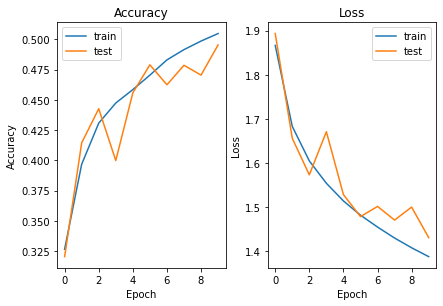

In [14]:
plot_results(history)

<div dir = "ltr" style="font-size: 20px;">
    momentum = 0.9 :
</div>

In [15]:
model = models.Sequential()
model.add(layers.Dense(100, input_shape = input_shape, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dense(60, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dense(10, activation=activations.softmax))

model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.9), loss=losses.categorical_crossentropy, metrics=["accuracy"])

In [16]:
history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, batch_size=32)

Epoch 1/10


2023-01-31 07:36:19.398761: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 3s 2ms/step - loss: 1.8938 - accuracy: 0.3069 - val_loss: 1.7598 - val_accuracy: 0.3532
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.7442 - accuracy: 0.3676 - val_loss: 1.7177 - val_accuracy: 0.3799
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6892 - accuracy: 0.3928 - val_loss: 1.6549 - val_accuracy: 0.4083
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6452 - accuracy: 0.4098 - val_loss: 1.6330 - val_accuracy: 0.4084
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6260 - accuracy: 0.4184 - val_loss: 1.6803 - val_accuracy: 0.3982
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.6036 - accuracy: 0.4236 - val_loss: 1.6030 - val_accuracy: 0.4244
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.5864 - accuracy: 0.4315 - val_loss: 1.5855 - val_accuracy: 0.4285
Epo

In [17]:
report_results(model, x_train, x_test, y_train, y_test)

1563/1563 [==============================] - 1s 766us/step
Train:
              precision    recall  f1-score   support

           0       0.64      0.38      0.48      5000
           1       0.49      0.70      0.58      5000
           2       0.41      0.21      0.28      5000
           3       0.33      0.28      0.30      5000
           4       0.40      0.37      0.38      5000
           5       0.48      0.21      0.29      5000
           6       0.42      0.62      0.50      5000
           7       0.42      0.67      0.52      5000
           8       0.52      0.68      0.59      5000
           9       0.51      0.47      0.49      5000

    accuracy                           0.46     50000
   macro avg       0.46      0.46      0.44     50000
weighted avg       0.46      0.46      0.44     50000

313/313 [==============================] - 0s 732us/step
Test:
              precision    recall  f1-score   support

           0       0.63      0.39      0.48      1000
   

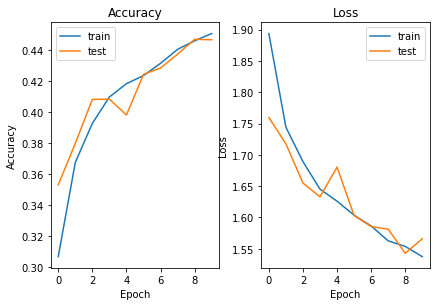

In [18]:
plot_results(history)

<div dir = "ltr" style="font-size: 20px;">
    momentum = 0.98 :
</div>

In [19]:
model = models.Sequential()
model.add(layers.Dense(100, input_shape = input_shape, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dense(60, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dense(10, activation=activations.softmax))

model.compile(optimizer=optimizers.SGD(learning_rate=0.01, momentum=0.98), loss=losses.categorical_crossentropy, metrics=["accuracy"])

In [20]:
history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 2.0396 - accuracy: 0.2416 - val_loss: 1.9031 - val_accuracy: 0.2901
Epoch 2/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9037 - accuracy: 0.3022 - val_loss: 1.8365 - val_accuracy: 0.3292
Epoch 3/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8664 - accuracy: 0.3169 - val_loss: 1.8155 - val_accuracy: 0.3373
Epoch 4/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8340 - accuracy: 0.3308 - val_loss: 1.9070 - val_accuracy: 0.2991
Epoch 5/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8300 - accuracy: 0.3348 - val_loss: 1.7845 - val_accuracy: 0.3495
Epoch 6/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8287 - accuracy: 0.3315 - val_loss: 1.8378 - val_accuracy: 0.3150
Epoch 7/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.8148 - accuracy: 0.3353 - val_loss: 1.7928 - val_accuracy:

In [21]:
report_results(model, x_train, x_test, y_train, y_test)

1563/1563 [==============================] - 1s 777us/step
Train:
              precision    recall  f1-score   support

           0       0.40      0.54      0.46      5000
           1       0.53      0.20      0.29      5000
           2       0.24      0.05      0.09      5000
           3       0.26      0.18      0.21      5000
           4       0.24      0.36      0.29      5000
           5       0.38      0.32      0.34      5000
           6       0.34      0.62      0.44      5000
           7       0.50      0.32      0.39      5000
           8       0.68      0.13      0.22      5000
           9       0.31      0.75      0.44      5000

    accuracy                           0.35     50000
   macro avg       0.39      0.35      0.32     50000
weighted avg       0.39      0.35      0.32     50000

313/313 [==============================] - 0s 852us/step
Test:
              precision    recall  f1-score   support

           0       0.41      0.55      0.47      1000
   

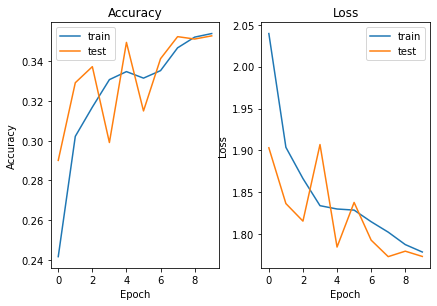

In [22]:
plot_results(history)

<div dir = "ltr" style="font-size: 20px;">
    Adam :
</div>

In [9]:
model = models.Sequential()
model.add(layers.Dense(100, input_shape = input_shape, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dense(60, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dense(10, activation=activations.softmax))

model.compile(optimizer=optimizers.Adam(learning_rate=0.001), loss=losses.categorical_crossentropy, metrics=["accuracy"])

In [10]:
history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, batch_size=32)

Epoch 1/10


2023-01-31 07:41:20.581306: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 5s 3ms/step - loss: 1.8773 - accuracy: 0.3259 - val_loss: 1.7247 - val_accuracy: 0.3810
Epoch 2/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.7155 - accuracy: 0.3862 - val_loss: 1.6701 - val_accuracy: 0.3974
Epoch 3/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.6506 - accuracy: 0.4107 - val_loss: 1.6707 - val_accuracy: 0.3970
Epoch 4/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5981 - accuracy: 0.4307 - val_loss: 1.6453 - val_accuracy: 0.4165
Epoch 5/10
1563/1563 [==============================] - 4s 3ms/step - loss: 1.5670 - accuracy: 0.4374 - val_loss: 1.5482 - val_accuracy: 0.4445
Epoch 6/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5360 - accuracy: 0.4519 - val_loss: 1.5780 - val_accuracy: 0.4321
Epoch 7/10
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5147 - accuracy: 0.4559 - val_loss: 1.5808 - val_accuracy: 0.4332
Epo

In [11]:
report_results(model, x_train, x_test, y_train, y_test)

 120/1563 [=>............................] - ETA: 1s

2023-01-31 07:42:09.381529: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 [==============================] - 1s 758us/step
Train:
              precision    recall  f1-score   support

           0       0.58      0.44      0.50      5000
           1       0.52      0.72      0.60      5000
           2       0.38      0.26      0.31      5000
           3       0.34      0.37      0.35      5000
           4       0.41      0.48      0.44      5000
           5       0.49      0.28      0.36      5000
           6       0.45      0.63      0.53      5000
           7       0.66      0.46      0.54      5000
           8       0.53      0.72      0.61      5000
           9       0.54      0.47      0.50      5000

    accuracy                           0.48     50000
   macro avg       0.49      0.48      0.47     50000
weighted avg       0.49      0.48      0.47     50000

313/313 [==============================] - 0s 806us/step
Test:
              precision    recall  f1-score   support

           0       0.57      0.44      0.50      1000
   

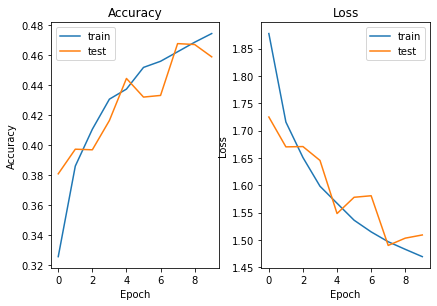

In [12]:
plot_results(history)

<div dir = "rtl" style="font-size: 16px;">
    در مسائل طبقه بندی تصویر، عملکرد Adam از لحاظ قدرت تعمیم، به طور قابل توجهی
    <br>
    <br>
    کمتر از SGD است. می توان با تنظیم چندین فرا پارامتر درونی آن، عملکرد Adam را
    <br>
    <br>
    بهتر کرد. که این استفاده از Adam را به لحاظ محاسباتی بسیار گران خواهد کرد.
</div>

# Epoch :

<div dir = "rtl" style="font-size: 16px;">
    خیر، همیشه نیاز نیست که چندین epoch داشته باشیم. چرا که گاهی اوقات که به اندازه‌ی کافی داده نداریم چندین epoch انجام می‌دهیم
    <br>
    <br>
    و در هر epoch از داده تکراری برای آموزش مدل استفاده می‌کنیم.
    <br>
    <br>
    اما اگر به اندازه ی کافی داده داشته باشیم، ممکن است یک epoch هم کافی باشد.
    <br>
    <br>
    افزایش بیش از اندازه ی epoch ها می‌تواند باعث overfitting شود که برای جلوگیری از آن می‌توان
    <br>
    <br>
    آموزش را هر زمان که دقت برای validation data شروع به کاهش کرد، متوقف کنیم.
    <br>
    <br>
    یا این که معماری را تغییر دهیم یعنی :
    <br>
    <br>
    پیچیدگی شبکه را با تغییر در ساختار آن تغییر دهیم.
    <br>
    <br>
    یا پیچیدگی شبکه را با تغییر در پارامتر هایش تغییر دهیم.
    <br>
    <br>
    یا مدل را در طول train بر اساس مقدار activation ها جریمه کنیم.
    <br>
    <br>
    یا مقادیر وزن ها را محدود کنیم.
    <br>
    <br>
    یا به شکل احتمالی ورودی ها را در طول train حذف کنیم
    <br>
    <br>
    یا به ورودی ها noise اضافه کنیم.
</div>

# Loss Function :

In [6]:
model = models.Sequential()
model.add(layers.Dense(100, input_shape = input_shape, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dense(60, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dense(10, activation=activations.softmax))

model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss="mse", metrics=["accuracy"])

In [7]:
history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 3s 1ms/step - loss: 0.0892 - accuracy: 0.1585 - val_loss: 0.0881 - val_accuracy: 0.1829
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0872 - accuracy: 0.2076 - val_loss: 0.0865 - val_accuracy: 0.2362
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0857 - accuracy: 0.2463 - val_loss: 0.0851 - val_accuracy: 0.2681
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0844 - accuracy: 0.2675 - val_loss: 0.0839 - val_accuracy: 0.2807
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0833 - accuracy: 0.2836 - val_loss: 0.0828 - val_accuracy: 0.2930
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0824 - accuracy: 0.2974 - val_loss: 0.0820 - val_accuracy: 0.3063
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 0.0816 - accuracy: 0.3137 - val_loss: 0.0811 - val_accuracy:

In [8]:
report_results(model, x_train, x_test, y_train, y_test)

1563/1563 [==============================] - 1s 635us/step
Train:
              precision    recall  f1-score   support

           0       0.41      0.45      0.43      5000
           1       0.32      0.42      0.37      5000
           2       0.27      0.11      0.16      5000
           3       0.27      0.22      0.24      5000
           4       0.32      0.33      0.32      5000
           5       0.32      0.31      0.31      5000
           6       0.33      0.41      0.37      5000
           7       0.35      0.30      0.32      5000
           8       0.44      0.51      0.47      5000
           9       0.38      0.43      0.40      5000

    accuracy                           0.35     50000
   macro avg       0.34      0.35      0.34     50000
weighted avg       0.34      0.35      0.34     50000

313/313 [==============================] - 0s 699us/step
Test:
              precision    recall  f1-score   support

           0       0.43      0.46      0.44      1000
   

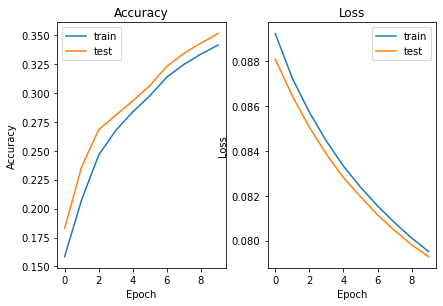

In [9]:
plot_results(history)

<div dir = "rtl" style="font-size: 16px;">
    دقت مدل کاهش می‌یابد، دلیلش این است که Cross-entropy برای مسائل Classification و MSE(mean Sequential) برای مسائل Regression 
    <br>
    <br>
    مناسب تر است. دلیل آن هم این است که در مسائل Classification تعداد جواب های ممکن محدود است و این باعث می‌شود که MSE نتواند به درستی کار کند.
</div>

# Regularization :

In [10]:
model = models.Sequential()
model.add(layers.Dense(100, input_shape = input_shape, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Dense(60, activation=layers.LeakyReLU(alpha=0.01)))
model.add(layers.Dropout(rate=0.1))
model.add(layers.Dense(10, activation=activations.softmax))

model.compile(optimizer=optimizers.SGD(learning_rate=0.01), loss=losses.categorical_crossentropy, metrics=["accuracy"])

In [11]:
history = model.fit(x_train, y_train_cat, validation_data=(x_test, y_test_cat), epochs=10, batch_size=32)

Epoch 1/10
1563/1563 [==============================] - 3s 2ms/step - loss: 1.9649 - accuracy: 0.2877 - val_loss: 1.8273 - val_accuracy: 0.3408
Epoch 2/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7989 - accuracy: 0.3526 - val_loss: 1.7114 - val_accuracy: 0.3851
Epoch 3/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.7261 - accuracy: 0.3837 - val_loss: 1.6592 - val_accuracy: 0.4152
Epoch 4/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6850 - accuracy: 0.3989 - val_loss: 1.6014 - val_accuracy: 0.4397
Epoch 5/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6471 - accuracy: 0.4130 - val_loss: 1.6116 - val_accuracy: 0.4291
Epoch 6/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.6162 - accuracy: 0.4251 - val_loss: 1.6151 - val_accuracy: 0.4312
Epoch 7/10
1563/1563 [==============================] - 2s 1ms/step - loss: 1.5900 - accuracy: 0.4347 - val_loss: 1.5094 - val_accuracy:

In [12]:
report_results(model, x_train, x_test, y_train, y_test)

1563/1563 [==============================] - 1s 683us/step
Train:
              precision    recall  f1-score   support

           0       0.56      0.44      0.49      5000
           1       0.56      0.59      0.57      5000
           2       0.41      0.23      0.29      5000
           3       0.39      0.30      0.34      5000
           4       0.48      0.35      0.41      5000
           5       0.49      0.27      0.34      5000
           6       0.49      0.56      0.52      5000
           7       0.44      0.65      0.52      5000
           8       0.57      0.64      0.60      5000
           9       0.40      0.72      0.52      5000

    accuracy                           0.48     50000
   macro avg       0.48      0.48      0.46     50000
weighted avg       0.48      0.48      0.46     50000

313/313 [==============================] - 0s 826us/step
Test:
              precision    recall  f1-score   support

           0       0.56      0.44      0.50      1000
   

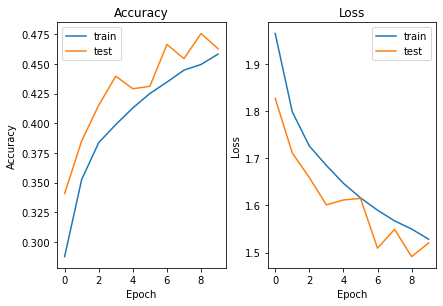

In [13]:
plot_results(history)

<div dir = "rtl" style="font-size: 16px;">
    این تکنیک به این شکل است که لایه هایی را با عنوان dropout به شبکه عصبی خود اضافه می‌کنیم و این لایه ها
    <br>
    <br>
    با  drop rate ثابت به شکل تصادفی مقدار خروجی برخی از رئوس لایه قبل را حذف می‌کنند و اجازه
    <br>
    <br>
    نمی‌دهند مقادیر تولید شده توسط این رئوس به لایه های بعد منتقل شوند.
    <br>
    <br>
    دلیل این کار این است که شبکه عصبی نسبت به خرابی مقاوم شود
    <br>
    <br>
    و حتی با حذف شدن برخی رئوس همچنان پاسخ درست بدهد.
</div>